In [1]:
filename = "call-center-example.csv"

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(filename, parse_dates={"start": ["Date", "Time"]})

In [4]:
df

start  Duration
0 2020-01-01 00:03:23      1117
1 2020-01-01 00:40:05       632
2 2020-01-01 00:10:35       803
3 2020-01-01 00:49:20       478
4 2020-01-01 00:50:39       894
5 2020-01-01 00:24:47       611
6 2020-01-01 00:15:25       171
7 2020-01-01 00:15:13       742
8 2020-01-01 00:06:38       388
9 2020-01-01 00:25:07       540

In [5]:
print("minimum duration = {} second(s)".format(df['Duration'].min()))

minimum duration = 171 second(s)


In [6]:
print("maximum duration =", df['Duration'].max(),"second(s)")

maximum duration = 1117 second(s)


In [7]:
print(f"average duration = {df['Duration'].mean():.3f} second(s)")

average duration = 637.600 second(s)


In [8]:
start = df["start"]

In [9]:
stop = start + pd.to_timedelta(df["Duration"], unit='s')

In [10]:
m = start.min()
i = start[start == m].index[0]

In [11]:
pd.DataFrame({"When": start, "Start": 1})

When  Start
0 2020-01-01 00:03:23      1
1 2020-01-01 00:40:05      1
2 2020-01-01 00:10:35      1
3 2020-01-01 00:49:20      1
4 2020-01-01 00:50:39      1
5 2020-01-01 00:24:47      1
6 2020-01-01 00:15:25      1
7 2020-01-01 00:15:13      1
8 2020-01-01 00:06:38      1
9 2020-01-01 00:25:07      1

In [12]:
pd.DataFrame({"When": stop, "Start": -1})

When  Start
0 2020-01-01 00:22:00     -1
1 2020-01-01 00:50:37     -1
2 2020-01-01 00:23:58     -1
3 2020-01-01 00:57:18     -1
4 2020-01-01 01:05:33     -1
5 2020-01-01 00:34:58     -1
6 2020-01-01 00:18:16     -1
7 2020-01-01 00:27:35     -1
8 2020-01-01 00:13:06     -1
9 2020-01-01 00:34:07     -1

In [13]:
df = pd.concat([
    pd.DataFrame({"When": m, "Start": 0}, index=[i]),
    pd.DataFrame({"When": start, "Start": 1}),
    pd.DataFrame({"When": stop, "Start": -1})
])

In [14]:
df = df.sort_values(by=["When", "Start"])

In [15]:
df['Count'] = df["Start"].cumsum()

In [16]:
print("maximum concurrent = {} call(s)".format(df['Count'].max()))

maximum concurrent = 4 call(s)


In [17]:
df

When  Start  Count
0 2020-01-01 00:03:23      0      0
0 2020-01-01 00:03:23      1      1
8 2020-01-01 00:06:38      1      2
2 2020-01-01 00:10:35      1      3
8 2020-01-01 00:13:06     -1      2
7 2020-01-01 00:15:13      1      3
6 2020-01-01 00:15:25      1      4
6 2020-01-01 00:18:16     -1      3
0 2020-01-01 00:22:00     -1      2
2 2020-01-01 00:23:58     -1      1
5 2020-01-01 00:24:47      1      2
9 2020-01-01 00:25:07      1      3
7 2020-01-01 00:27:35     -1      2
9 2020-01-01 00:34:07     -1      1
5 2020-01-01 00:34:58     -1      0
1 2020-01-01 00:40:05      1      1
3 2020-01-01 00:49:20      1      2
1 2020-01-01 00:50:37     -1      1
4 2020-01-01 00:50:39      1      2
3 2020-01-01 00:57:18     -1      1
4 2020-01-01 01:05:33     -1      0

In [18]:
import matplotlib.pyplot as plt

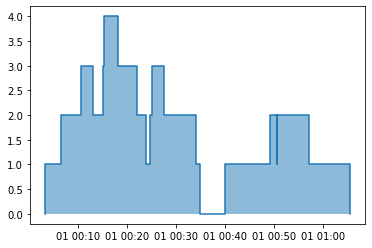

In [19]:
plt.step(df['When'], df['Count'], where="post")
plt.fill_between(df['When'], df['Count'], step="post", alpha=0.5)
plt.savefig("diagram.png", bbox_inches='tight')